In [19]:
import pandas as pd
import statsmodels.api as sm

data_dir = "../sheet0_one_hot.csv"

data = pd.read_csv(data_dir)

X = data.drop(columns=['id','weathered'])
y = data['weathered']

X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              weathered   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     5.595
Date:                Fri, 16 Sep 2022   Prob (F-statistic):           1.31e-05
Time:                        12:43:06   Log-Likelihood:                -16.593
No. Observations:                  58   AIC:                             57.19
Df Residuals:                      46   BIC:                             81.91
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4918      0.109      4.

/home/cqy/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


findfont: Font family ['NotoSansCJK'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NotoSansCJK'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NotoSansCJK'] not found. Falling back to DejaVu Sans.
/home/cqy/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 38085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/cqy/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 38049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/cqy/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 31867 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/cqy/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 25991 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/cqy/anaconda3/lib/python3.9/site-package

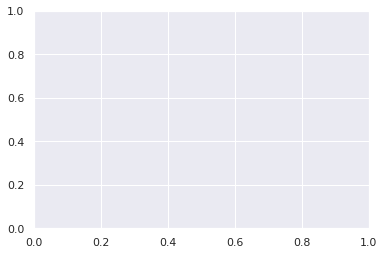

In [20]:
import pandas as pd
import seaborn as sns
import os

sheet0 = pd.read_csv('../sheet0_num.csv')
sheet1 = pd.read_csv('../sheet1_1.csv')

sheet0 = sheet0.drop(columns=["ornament", "color"])
sheet1 = sheet1.drop(columns=["weathered",]).fillna(0)

data = sheet0.merge(sheet1, left_on='id', right_on='id')

type_match = {
    0 : '铅钡',
    1 : '高钾',
}

degree_match = {
    0 : '无风化',
    1 : '风化',
}

plot_columns = ['sio', 'nao', 'ko', 'cao', 'mgo', 'alo', 'feo', 'cuo', 'pbo', 'bao', 'po', 'sro', 'sno', 'so']
matcher = {
    "sio": "二氧化硅(SiO2)",
    "nao": "氧化钠(Na2O)"  ,
    "ko" : "氧化钾(K2O)"   ,
    "cao": "氧化钙(CaO)"   , 
    "mgo": "氧化镁(MgO)"   ,
    "alo": "氧化铝(Al2O3)" ,
    "feo": "氧化铁(Fe2O3)" ,
    "cuo": "氧化铜(CuO)"   ,
    "pbo": "氧化铅(PbO)"   ,
    "bao": "氧化钡(BaO)"   ,
    "po" : "五氧化二磷(P2O5)",
    "sro": "氧化锶(SrO)"   ,
    "sno": "氧化锡(SnO2)"  ,
    "so" : "二氧化硫(SO2)" ,
}

os.system('rm ./plots/*')

sns.set(font='NotoSansCJK')

for type_ in range(2):
    for col in plot_columns:
        data0 = data[data.type == type_]
        plot = sns.violinplot(data=data0, x='degree', y=col)
        plot.set_title(f'{type_match[type_]}类文物风化前后{matcher[col]}含量分布对比图', fontsize=18, position=(0.5,1.05))
        plot.get_figure().savefig(f'./plots/{type_match[type_]}类文物风化前后{matcher[col]}含量分布对比图.png', dpi=400)
        plot.clear()

In [9]:
from scipy.stats import normaltest
import numpy as np
import pandas as pd

results = [['检验类型', "风化前 p-value", "风化前正态是否显著", "风化后 p-value", "风化后正态是否显著"]]
plot_columns = ['sio', 'nao', 'ko', 'cao', 'mgo', 'alo', 'feo', 'cuo', 'pbo', 'bao', 'po', 'sro', 'sno', 'so']
type_match = {
    0 : '铅钡',
    1 : '高钾',
}

degree_match = {
    0 : '无风化',
    1 : '风化',
}

matcher = {
    "sio": "二氧化硅(SiO2)",
    "nao": "氧化钠(Na2O)"  ,
    "ko" : "氧化钾(K2O)"   ,
    "cao": "氧化钙(CaO)"   , 
    "mgo": "氧化镁(MgO)"   ,
    "alo": "氧化铝(Al2O3)" ,
    "feo": "氧化铁(Fe2O3)" ,
    "cuo": "氧化铜(CuO)"   ,
    "pbo": "氧化铅(PbO)"   ,
    "bao": "氧化钡(BaO)"   ,
    "po" : "五氧化二磷(P2O5)",
    "sro": "氧化锶(SrO)"   ,
    "sno": "氧化锡(SnO2)"  ,
    "so" : "二氧化硫(SO2)" ,
}

data = pd.read_csv("../std_data.csv")



for type_ in range(2):
    for col in plot_columns:
        data0 = data[data.type == type_]
        data1 = data0[data0.degree == 0]
        k1, p1 = normaltest(data1[col])
        mean1, std1 = np.mean(data1[col]), np.std(data1[col])
        data2 = data0[data0.degree == 1]
        while len(data2[col])<8:
            data2 = pd.concat([data2,data2])
        k2, p2 = normaltest(data2[col])
        mean2, std2 = np.mean(data2[col]), np.std(data2[col])
        results.append([f'{type_match[type_]}类文物风化前后{matcher[col]}含量正态检验',p1,p1<0.1,p2,p2<0.1])

df = pd.DataFrame(results)
df.to_csv('正态检验.csv',index=False,float_format="%.3f")



/home/cqy/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/home/cqy/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/home/cqy/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [10]:
df = pd.read_csv("./正态检验.csv",skiprows=1)
df[["风化前 p-value",  "风化后 p-value"]] = df[["风化前 p-value", "风化后 p-value"]].astype('float')
print(df)
print(df.info())
df.to_csv('正态检验.csv',index=False,float_format="%.3f")

                          检验类型   风化前 p-value  风化前正态是否显著    风化后 p-value  \
0    铅钡类文物风化前后二氧化硅(SiO2)含量正态检验  3.965790e-01      False   2.909729e-01   
1     铅钡类文物风化前后氧化钠(Na2O)含量正态检验  4.532448e-03       True   1.350212e-07   
2      铅钡类文物风化前后氧化钾(K2O)含量正态检验  1.162713e-04       True   4.750137e-08   
3      铅钡类文物风化前后氧化钙(CaO)含量正态检验  6.676696e-03       True   2.551566e-01   
4      铅钡类文物风化前后氧化镁(MgO)含量正态检验  4.569793e-01      False   4.349955e-02   
5    铅钡类文物风化前后氧化铝(Al2O3)含量正态检验  6.019856e-01      False   8.144183e-06   
6    铅钡类文物风化前后氧化铁(Fe2O3)含量正态检验  1.310337e-02       True   1.639608e-03   
7      铅钡类文物风化前后氧化铜(CuO)含量正态检验  5.615051e-04       True   1.142773e-07   
8      铅钡类文物风化前后氧化铅(PbO)含量正态检验  5.865797e-01      False   2.931006e-01   
9      铅钡类文物风化前后氧化钡(BaO)含量正态检验  2.016298e-02       True   4.492608e-04   
10  铅钡类文物风化前后五氧化二磷(P2O5)含量正态检验  8.524544e-07       True   1.425927e-01   
11     铅钡类文物风化前后氧化锶(SrO)含量正态检验  3.324248e-01      False   2.636886e-02   
12    铅钡类文物风化前后氧化锡(SnO2)含量正态检验  7.2849

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
data_onehot = pd.read_csv("../sheet0_one_hot.csv").drop(['id'], axis=1)
for name in data_onehot.columns:
    print(name)

A
B
C
lead_barium
high_potassium
light_green
light_blue
dark_green
deep_blue
purple
green
blue_green
black
weathered


                  A         B         C  weathered
A          1.000000 -0.265543 -0.809174  -0.136831
B         -0.265543  1.000000 -0.351605   0.285391
C         -0.809174 -0.351605  1.000000  -0.041067
weathered -0.136831  0.285391 -0.041067   1.000000


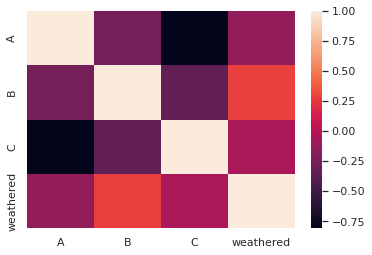

In [23]:
corr = data_onehot[['A', 'B', 'C', 'weathered']].corr()
sns.heatmap(corr)
print(corr)

                lead_barium  high_potassium  weathered
lead_barium        1.000000       -1.000000   0.344423
high_potassium    -1.000000        1.000000  -0.344423
weathered          0.344423       -0.344423   1.000000


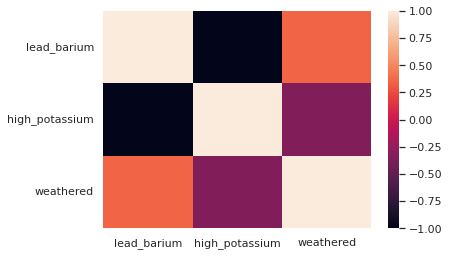

In [26]:
# lead_barium
# high_potassium
corr = data_onehot[['lead_barium', 'high_potassium', 'weathered']].corr()
sns.heatmap(corr)
print(corr)


             light_green  light_blue  dark_green  deep_blue    purple  \
light_green     1.000000   -0.169435   -0.086525  -0.044137 -0.063564   
light_blue     -0.169435    1.000000   -0.268774  -0.137102 -0.197450   
dark_green     -0.086525   -0.268774    1.000000  -0.070014 -0.100832   
deep_blue      -0.044137   -0.137102   -0.070014   1.000000 -0.051434   
purple         -0.063564   -0.197450   -0.100832  -0.051434  1.000000   
green          -0.030934   -0.096092   -0.049071  -0.025031 -0.036049   
blue_green     -0.137940   -0.428484   -0.218814  -0.111618 -0.160748   
black          -0.044137   -0.137102   -0.070014  -0.035714 -0.051434   
weathered      -0.119913    0.020317   -0.011117  -0.224934 -0.047638   

                green  blue_green     black  weathered  
light_green -0.030934   -0.137940 -0.044137  -0.119913  
light_blue  -0.096092   -0.428484 -0.137102   0.020317  
dark_green  -0.049071   -0.218814 -0.070014  -0.011117  
deep_blue   -0.025031   -0.111618 -0.0357

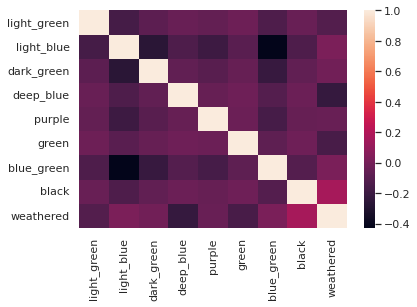

In [27]:
list=[
'light_green',
'light_blue',
'dark_green',
'deep_blue',
'purple',
'green',
'blue_green',
'black',
'weathered']
corr = data_onehot[list].corr()
sns.heatmap(corr)
print(corr)
